In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

In [4]:
a = [(0.01171875, 0.04296875, 0.0, 28.432327270507812), (0.021484375, 0.083984375, 0.0, 26.646419525146484), (0.0859375, 0.09765625, 0.0, 24.857213973999023), (6.86328125, -8.58984375, 0.0, 6.020599842071533), (10.6875, -2.759765625, 0.0, 10.0), (10.634765625, -3.1171875, 0.0, 13.424226760864258), (10.00390625, -4.8671875, 0.0, 16.53212547302246), (3.708984375, -0.0, 0.0, 17.923917770385742), (3.744140625, -0.234375, 0.0, 16.81241226196289), (3.875, -0.2421875, 0.0, 16.627578735351562), (3.923828125, -0.123046875, 0.0, 18.512582778930664), (3.962890625, -0.248046875, 0.0, 16.627578735351562), (4.142578125, 0.12890625, 0.0, 17.558748245239258), (8.576171875, -4.951171875, 0.0, 12.304489135742188), (8.615234375, -4.974609375, 0.0, 13.617278099060059), (8.826171875, -4.68359375, 0.0, 14.149733543395996), (8.86328125, -4.703125, 0.0, 16.434526443481445), (8.728515625, -5.0390625, 0.0, 12.787535667419434), (1.5859375, -0.302734375, 0.0, 9.542425155639648), (3.884765625, -3.37890625, 0.0, 12.304489135742188), (3.609375, -3.732421875, 0.0, 13.424226760864258), (3.640625, -3.763671875, 0.0, 13.222192764282227), (4.015625, -3.4921875, 0.0, 12.552724838256836), (4.048828125, -3.521484375, 0.0, 12.552724838256836), (3.927734375, -3.71875, 0.0, 12.787535667419434), (3.9609375, -3.75, 0.0, 12.304489135742188), (4.1484375, -3.607421875, 0.0, 11.461280822753906), (7.857421875, 2.029296875, 0.0, 10.0), (7.830078125, 2.294921875, 0.0, 12.552724838256836), (7.87109375, 2.306640625, 0.0, 12.041199684143066), (0.083984375, 0.025390625, 0.0, 25.69373893737793), (0.125, 0.041015625, 0.0, 24.653827667236328), (10.32421875, -3.779296875, 0.0, 4.771212577819824), (10.365234375, 3.794921875, 0.0, 10.0), (8.650390625, -6.92578125, 0.0, 13.424226760864258), (11.103515625, -0.6953125, 0.0, 15.797836303710938), (8.05078125, -1.013671875, 0.0, 9.542425155639648)]
PC = np.array(a)
PC.shape

(37, 4)

In [26]:
PCXY = PC[:,(1,0,3)] #throw away Z axis

In [42]:
def filter(arr, factor=1):
    return arr[arr[:,2] > arr[:,2].mean()*factor] #keep only if reflectivity bigger than mean
    

def plot2DPC(arr_2d_pc):
    X, Y, reflectivity = [arr_2d_pc[:,i] for i in range(arr_2d_pc.shape[-1])]
    plt.figure(figsize=(20,10))
    axes = plt.gca()
    axes.set_xlim([-10,10])
    plt.scatter(X, Y, c=reflectivity, cmap='jet')
    plt.colorbar()
    plt.show()

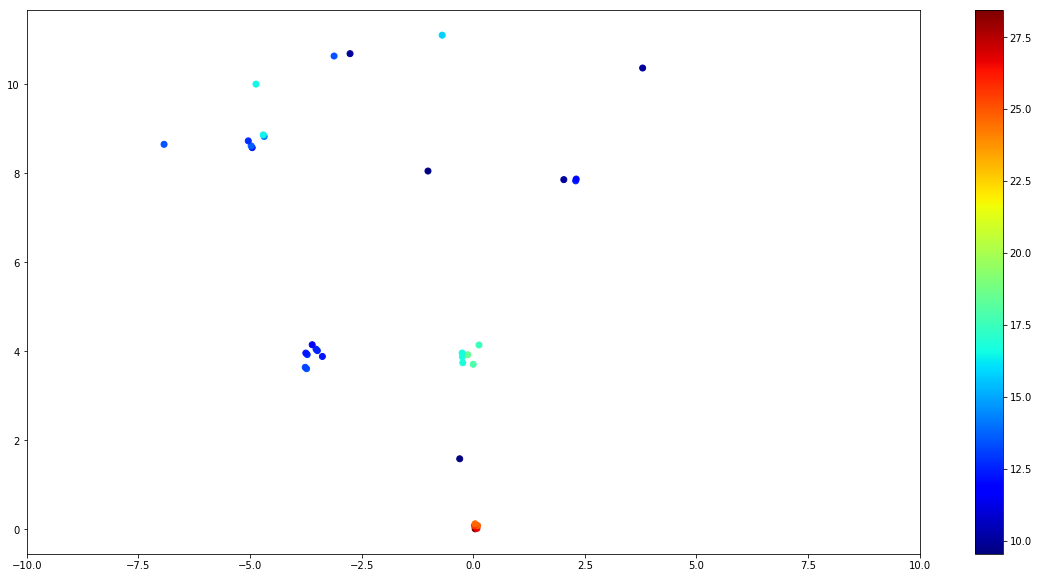

In [28]:
PCXY_filtered = filter(PCXY, factor=0.5)
plot2DPC(PCXY_filtered)

In [32]:
centroids, labels, _ = cluster.k_means(PCXY_filtered[:,0:2], 10)

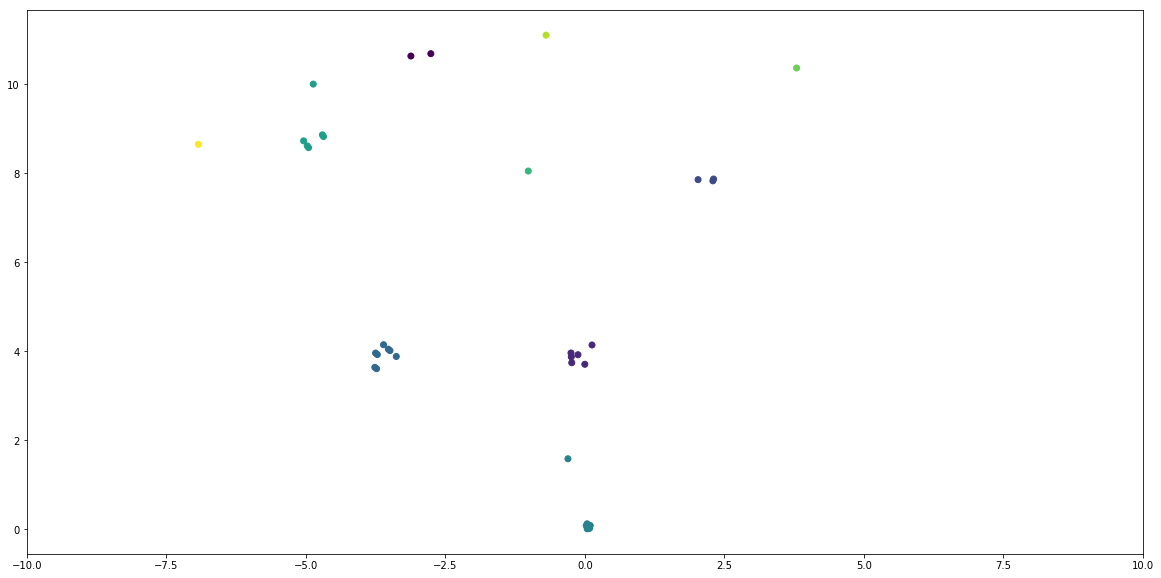

In [41]:
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([-10,10])
plt.scatter(PCXY_filtered[:,0], PCXY_filtered[:,1], c=labels)